# **Exploratory Analysis on Lunch Delivery Time Series Data**

## **1. Import data**


- num_matrix is number of orders: col=time periods, row=locations.

- quan_matrix is total quantity ordered.

- distance_matrix is the distance between two locations.

- time.csv records the date/time of each period


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
data_dir = "/home/angps/Documents/Thesis/Data/"


**Importing Demand for each location and time period**

In [2]:
loc_time_demand_df = pd.read_csv(data_dir + "num_matrix.txt", header=None, names = list(range(1,205)), delim_whitespace=True)

In [3]:
loc_time_demand_df.shape

(839, 204)

In [4]:
loc_time_demand_df.head()

,1,2,3,4,5,6,7,8,9,10,...,195,196,197,198,199,200,201,202,203,204
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Import time-date mapping df**

In [5]:
time_date_df = pd.read_csv(data_dir + "time.csv", index_col=0)
time_date_df['date'] = pd.to_datetime(time_date_df['date'])

In [6]:
time_date_df.head()

,date,weekday
1,2015-08-10,Monday
2,2015-08-10,Monday
3,2015-08-10,Monday
4,2015-08-10,Monday
5,2015-08-10,Monday


In [7]:
time_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 204
Data columns (total 2 columns):
date       204 non-null datetime64[ns]
weekday    204 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 4.8+ KB


## **2. Exploratory Analysis on Demand Data**

### **2.1 Mean of each day**

Text(0.5, 1.0, 'Mean Demand of all locations across days')

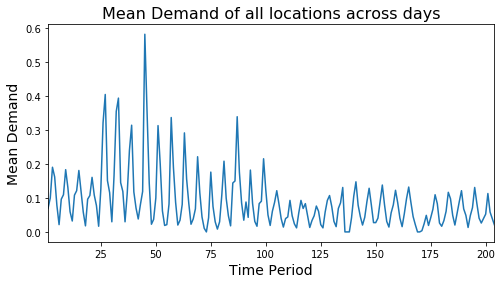

In [8]:
mean_demand = loc_time_demand_df.mean()
mean_demand.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of all locations across days", fontsize = 16)

### **2.2 Percentage of locations with low counts of demand**

In [9]:
num_of_non_zeros = (loc_time_demand_df != 0).sum(axis=1)

(array([689.,  70.,  33.,  17.,  11.,   6.,   5.,   3.,   1.,   4.]),
 array([  0. ,  14.8,  29.6,  44.4,  59.2,  74. ,  88.8, 103.6, 118.4,
        133.2, 148. ]),
 <a list of 10 Patch objects>)

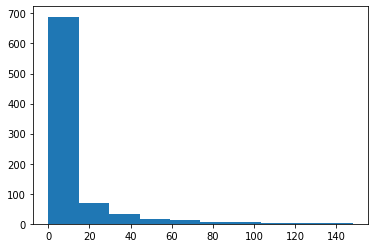

In [10]:
plt.hist(num_of_non_zeros)

In [11]:
num_of_non_zeros.describe(percentiles=[0.95])

count    839.000000
mean       9.909416
std       19.564321
min        0.000000
50%        2.000000
95%       48.200000
max      148.000000
dtype: float64

We can see that there are alot of locations with very low non-zero demands (<10) in total for 2 months. To construct a baseline model, I would just use locations with **at least 50 counts** of data over 2 months

## **3. Baseline Model**

### **3.1 Subsetting data with at least 50 counts**

In [12]:
min_count = 50
df_atleast_50_cts = loc_time_demand_df[(loc_time_demand_df > 0).sum(axis=1) >= min_count].reset_index(drop=True)

In [13]:
df_atleast_50_cts.head()

,1,2,3,4,5,6,7,8,9,10,...,195,196,197,198,199,200,201,202,203,204
0,0,1,5,3,1,1,1,4,6,2,...,7,0,1,1,2,1,2,1,1,1
1,1,2,3,0,3,0,1,2,4,2,...,0,0,2,0,0,0,0,0,1,0
2,0,0,2,5,1,0,0,4,4,0,...,2,1,0,0,1,0,1,1,0,0
3,0,2,7,5,4,0,4,4,4,2,...,2,0,0,1,3,0,5,1,0,0
4,0,0,1,6,0,0,1,3,3,1,...,0,1,0,0,1,0,3,0,0,0


In [14]:
df_atleast_50_cts.shape

(42, 204)

### **3.2 Mean Demand of sample individual location (>= 50 non-zero counts) across days**

Text(0.5, 1.0, 'Mean Demand of location 0')

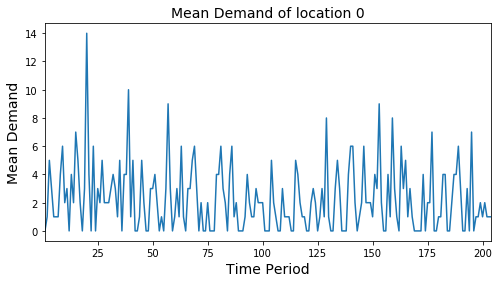

In [15]:
mean_demand_0 = df_atleast_50_cts.iloc[0,:]
mean_demand_0.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of location 0", fontsize = 14)

Text(0.5, 1.0, 'Mean Demand of location 24')

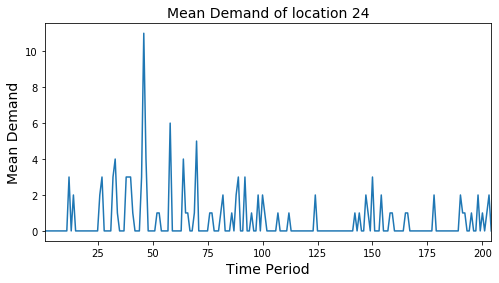

In [16]:
mean_demand_24 = df_atleast_50_cts.iloc[24,:]
mean_demand_24.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of location 24", fontsize = 14)

### **3.3 Mean Demand of locations (>= 50 non-zero counts) across days**

Text(0.5, 1.0, 'Mean Demand of locations (>= 50 non-zero counts) across days')

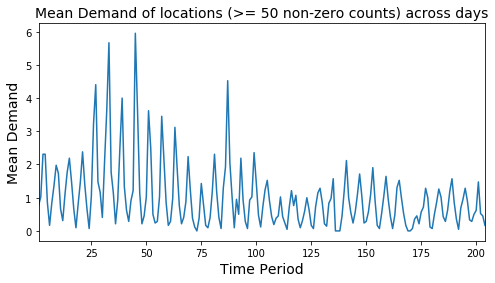

In [17]:
mean_demand_all = df_atleast_50_cts.mean()
mean_demand_all.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of locations (>= 50 non-zero counts) across days", fontsize = 14)

### **3.4 Testing for stationarity for mean demand across locations (>= 50 non-zero counts) across days**

2 tests for stationarity would be used: **ADF (Augmented Dickey Fuller) Test** and **KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test**.

ADF (Augmented Dickey Fuller) Test can help detect unit root and hence helping us understand if the series is stationary or not.

The **null and alternate hypothesis of the ADF test** are:

Null Hypothesis of ADF: **Non-Stationary**: The series has a unit root

Alternate Hypothesis of ADF: **Stationary**: The series has no unit root.


The **null and alternate hypothesis for the KPSS test** are opposite that of the ADF test.

Null Hypothesis of KPSS: **Trend-Stationary** 

Alternate Hypothesis KPSS: **Non-Stationary**: The series has a unit root

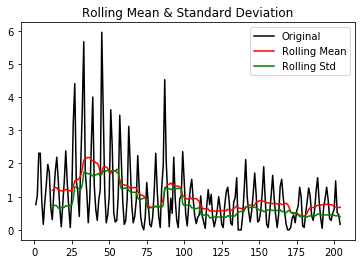

Results of ADF Test:
Test Statistic                  -1.633495
p-value                          0.465662
#Lags Used                      11.000000
Number of Observations Used    192.000000
Critical Value (1%)             -3.464875
Critical Value (5%)             -2.876714
Critical Value (10%)            -2.574859
dtype: float64


In [18]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='black',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of ADF Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
mean_demand = mean_demand_all
adf_test(mean_demand)

In [19]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value

    print (kpss_output)
kpss_test(mean_demand)

Results of KPSS Test:
Test Statistic            0.855758
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/home/angps/anaconda3/envs/deeplearning2/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


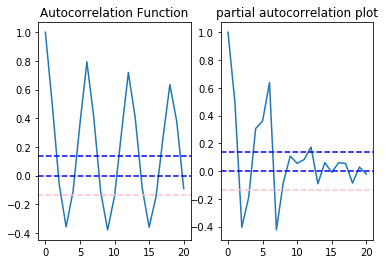

In [20]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(mean_demand,nlags=20)
lag_pacf = pacf(mean_demand,nlags=20,method='ols')

########## ACF ############

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(mean_demand)),linestyle='--',color='pink')
plt.axhline(y=1.96/np.sqrt(len(mean_demand)),linestyle='--',color='blue')
plt.title('Autocorrelation Function')


############ PACF ###########

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(mean_demand)),linestyle='--',color='pink')
plt.axhline(y=1.96/np.sqrt(len(mean_demand)),linestyle='--',color='blue')
plt.title('partial autocorrelation plot')
plt.show()

We can see that our time series is **non-stationary**

### **3.5 Transforming the time series to make it stationary**

Let's first try to perform differencing. 

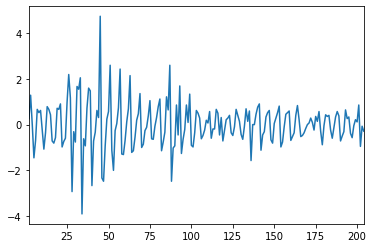

In [21]:
mean_demand = mean_demand - mean_demand.shift(1)
mean_demand.dropna().plot()

In [22]:
mean_demand = mean_demand.dropna()

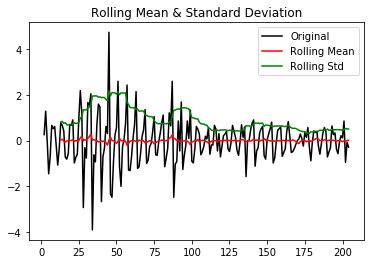

Results of ADF Test:
Test Statistic                -7.092853e+00
p-value                        4.364743e-10
#Lags Used                     1.000000e+01
Number of Observations Used    1.920000e+02
Critical Value (1%)           -3.464875e+00
Critical Value (5%)           -2.876714e+00
Critical Value (10%)          -2.574859e+00
dtype: float64


In [23]:
adf_test(mean_demand)

In [24]:
kpss_test(mean_demand)

Results of KPSS Test:
Test Statistic            0.041494
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/home/angps/anaconda3/envs/deeplearning2/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [25]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

/home/angps/anaconda3/envs/deeplearning2/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/angps/anaconda3/envs/deeplearning2/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### **3.6 Applying ARIMA on the 42 locations (>= 50 non-zero counts)**

**Splitting training and test set**

We will use the first 27 days as the training set and the next 7 days as test set

In [72]:
from statsmodels.tools.eval_measures import rmse, aic
train_df = df_atleast_50_cts.iloc[:, 0:162]
test_df = df_atleast_50_cts.iloc[:, 162:]

In [73]:

def fit_arima_get_rmse(train, test):
    model = auto_arima(train, trace=False, error_action='ignore', suppress_warnings=True)
    model.fit(train)
    forecast = model.predict(n_periods=len(test))
    mse = rmse(test, forecast)
    return mse


In [74]:
loss = []
for i in range(len(train_df)):
    train = train_df.iloc[i,:]
    test = test_df.iloc[i,:]
    mse = fit_arima_get_rmse(train, test)
    loss.append(mse)
print("Mean of MSE for baseline ARIMA model: " + str(np.mean(loss)))

Mean of MSE for baseline ARIMA model: 1.037695504411153


In [28]:
trg = train_df.iloc[6,:]
tst = test_df.iloc[6,:]

In [29]:
model = auto_arima(trg, trace=False, error_action='ignore', suppress_warnings=True, seasonal=False)
model.fit(trg)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(5, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

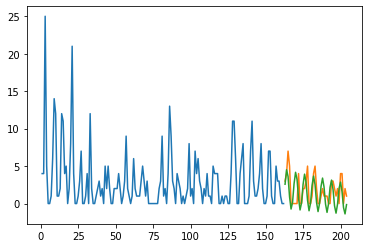

4.058774654922807


In [30]:
forecast = model.predict(n_periods=len(tst))
forecast = pd.DataFrame(forecast,index = tst.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(trg, label='Train')
plt.plot(tst, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

mse = mean_squared_error(tst, forecast)
print(mse)

## **4. VAR Model**

In [34]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


In [35]:
train_df_mat = train_df.to_numpy()
train_df_mat

array([[ 0,  1,  5, ...,  3,  1,  0],
       [ 1,  2,  3, ...,  3,  2,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 0,  3,  2, ...,  0,  0,  0],
       [ 0, 10,  6, ...,  0,  0,  0]])

In [37]:
train_df_1 = train_df.diff(axis=1).dropna(axis=1)
train_df_1.shape

(42, 161)

In [55]:
test_df_1 = test_df.diff(axis=1).dropna(axis=1)
test_df_1.shape

(42, 41)

In [56]:
test_df_1.values

array([[-3.,  2., -4., ..., -1.,  0.,  0.],
       [ 6., -4.,  1., ...,  0.,  1., -1.],
       [ 2.,  3., -4., ...,  0., -1.,  0.],
       ...,
       [ 0., -1.,  0., ..., -2.,  0.,  0.],
       [ 1., -1., -1., ..., -1.,  0.,  0.],
       [ 2.,  0., -2., ..., -3.,  1., -1.]])

In [50]:
train_df.T.iloc[[-1]]

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
162,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test_df_1.head()

,164,165,166,167,168,169,170,171,172,173,...,195,196,197,198,199,200,201,202,203,204
0,-3.0,2.0,-4.0,2.0,-2.0,-1.0,0.0,0.0,0.0,4.0,...,7.0,-7.0,1.0,0.0,1.0,-1.0,1.0,-1.0,0.0,0.0
1,6.0,-4.0,1.0,-2.0,0.0,-1.0,0.0,0.0,1.0,-1.0,...,0.0,0.0,2.0,-2.0,0.0,0.0,0.0,0.0,1.0,-1.0
2,2.0,3.0,-4.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,-1.0,0.0
3,-1.0,6.0,-5.0,-2.0,2.0,-2.0,0.0,0.0,1.0,-1.0,...,-2.0,-2.0,0.0,1.0,2.0,-3.0,5.0,-4.0,-1.0,0.0
4,0.0,4.0,-4.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,1.0,-1.0,0.0,1.0,-1.0,3.0,-3.0,0.0,0.0


In [66]:
for o in range(1,25):
    model = VAR(endog=train_df_1.T.reset_index(drop=True))
    model_var = model.fit(o)
    yhat = model_var.forecast(test_df_1.T.values[-o:], steps=len(test_df_1))
    # yhat = np.cumsum(yhat,axis=1) + train_df.T.iloc[-o:,:].values.reshape((-o,o))
    errors=[]
    for i in range(len(test_df)):
        error = rmse(test_df.iloc[i,:], yhat[i])
        errors.append(error)
    print("Lag " + str(o) + ": " , round(np.mean(errors),3))

Lag 1:  1.213
Lag 2:  1.404
Lag 3:  3.054
Lag 4:  22.704
Lag 5:  3.958
Lag 6:  3.109
Lag 7:  2.574
Lag 8:  2.236
Lag 9:  2.14
Lag 10:  2.078
Lag 11:  1.896
Lag 12:  1.759
Lag 13:  1.674
Lag 14:  1.626
Lag 15:  1.612
Lag 16:  1.616
Lag 17:  1.616
Lag 18:  1.603
Lag 19:  1.581
Lag 20:  1.573
Lag 21:  1.57
Lag 22:  1.581
Lag 23:  1.588
Lag 24:  1.55


In [69]:
rmse(np.array([1,2,3]), np.array([3,2,1]))

1.632993161855452

## **5. Deep Learning Model**

In [ ]:
import torch
import torch.nn as nn
from torch import optim
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
def transform_data(arr, seq_len):
    x, y = [], []
    for i in range(len(arr) - seq_len):
        x_i = arr[i : i + seq_len]
        y_i = arr[i + 1 : i + seq_len + 1]
        x.append(x_i)
        y.append(y_i)
    x_arr = np.array(x).reshape(-1, seq_len)
    y_arr = np.array(y).reshape(-1, seq_len)
    x_var = Variable(torch.from_numpy(x_arr).int())
    y_var = Variable(torch.from_numpy(y_arr).int())
    return x_var, y_var
seq_len = 30
x_train, y_train = transform_data(train_arr, seq_len)
x_val, y_val = transform_data(val_arr, seq_len)
x_test, y_test = transform_data(test_arr, seq_len)

In [ ]:


class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers, dropout=0):
        super(LSTM, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.output_size = output_size
        self.dropout = dropout
        self.lstm = nn.LSTM(input_size, hidden_size, n_layers, dropout=dropout)
        self.linear = nn.Linear(hidden_size, output_size, bias=True)
        self.hidden = None

    def init_hidden(self, batch_size):
        return (Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size)),
                Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size)))

    def forward(self, input_seqs):
        lstm_outputs, lstm_hiddens = self.lstm(input_seqs)
        outputs = self.linear(lstm_outputs)
        return outputs

In [ ]:
def train(input_batches, target_batches, lstm, optimizer, use_cuda=False):

    lstm = lstm.train()
    optimizer.zero_grad()

    input_batches = Variable(input_batches, requires_grad=False)
    target_batches = Variable(target_batches, requires_grad=False)

    if use_cuda:
        input_batches = input_batches.cuda()
        target_batches = target_batches.cuda()

    prediction_batches = lstm(input_batches)
    prediction_batches = prediction_batches[-1].transpose(0, 1)
    prediction_batches = prediction_batches.unsqueeze(2)

    criterion = nn.MSELoss()

    loss = criterion(prediction_batches.transpose(0, 1).contiguous(),
                   target_batches.transpose(0, 1).contiguous())

    loss.backward()
    optimizer.step()

    return loss.data[0]

def evaluate(inputs, targets, lstm, use_cuda=False):
    lstm = lstm.eval()
    if use_cuda:
        inputs = inputs.cuda()
        targets = targets.cuda()
    n_batches = inputs.shape[0]
    total_loss = 0
    for i in range(n_batches):
        lstm.hidden = None
        input_batch = inputs[i]
        target_batch = targets[i]
        prediction_batch = predict(input_batch, lstm, use_cuda)
        loss = get_mse(prediction_batch, target_batch)
        total_loss += loss

    loss_mean = total_loss / n_batches

    return loss_mean

def get_mse(predictions, targets):
    predictions = predictions.contiguous().view(predictions.numel())
    targets = targets.contiguous().view(targets.numel()).contiguous()
    mse = ((predictions - targets) ** 2).mean()
    return mse


def predict(input_sequences, lstm, use_cuda=False):
    lstm = lstm.eval()
    input_sequences = Variable(input_sequences, requires_grad=False)
    if use_cuda:
        input_sequences = input_sequences.cuda()
    predictions = lstm(input_sequences)
    predictions = predictions[-1].transpose(0, 1).unsqueeze(-1)
    return predictions.data


def predict_batches(input_batches, target_batches, lstm, use_cuda=False):
    if use_cuda:
        input_batches = input_batches.cuda()
        target_batches = target_batches.cuda()
    lstm = lstm.eval()
    n_batches = input_batches.shape[0]
    output_size = lstm.output_size
    batch_size = input_batches.shape[2]
    all_predictions = torch.zeros(n_batches, output_size, batch_size, 1)
    total_loss = 0
    for i in range(n_batches):
        lstm.hidden = None
        input_batch = input_batches[i]
        target_batch = target_batches[i]
        prediction_batch = predict(input_batch, lstm, use_cuda)
        all_predictions[i] = prediction_batch
        loss = get_mse(prediction_batch, target_batch)
        total_loss += loss

    mean_loss = total_loss / n_batches

    return all_predictions, mean_loss

In [ ]:
input_size = 1
output_size = 1
hidden_size = 100
n_layers = 3
lr = 0.001
batch_size = 32
input_seq_len = 30
output_seq_len = 1
dropout = 0.5

use_cuda = False
n_epochs = 3
optimizer = optim.Adam(lstm.parameters(), lr=lr)

best_val_loss = 1000
train_loss = 0
for epoch in range(n_epochs):
    n_batches = x_train.shape[0]
    for i in range(n_batches):
        lstm.hidden = None
        input_batches = x_train[i]
        target_batches = targets_train[i]
        train_loss = train(input_batches, target_batches, lstm, optimizer, use_cuda)

    epoch_train_loss = evaluate(x_train, targets_train, lstm, use_cuda)
    epoch_val_loss = evaluate(x_val, targets_val, lstm, use_cuda)

    print("epoch %i/%i" % (epoch + 1, n_epochs))
    print("traing loss is %f, validation loss is %f" % (epoch_train_loss, epoch_val_loss))

    if epoch_val_loss < best_val_loss:
        print("Saving the model...")
        best_val_loss = epoch_val_loss
        torch.save(lstm.state_dict(), checkpoint_file)